Compare the difference.<br>

In [182]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [183]:
def generate_oe_matrix(variance_threshold_L = 0.7, variance_threshold_U = 0.8):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(6, 6) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.7309780892524429 

[[12.4  14.49 13.6  13.17 15.53 22.32]
 [14.49  7.78 15.28 14.06 15.86  8.51]
 [13.6  15.28  4.14 10.8  12.59 10.82]
 [13.17 14.06 10.8   2.7  10.29 21.05]
 [15.53 15.86 12.59 10.29 24.84  4.19]
 [22.32  8.51 10.82 21.05  4.19 36.38]] 



### PCA
MOSAIC perform PCA on O/E matrix <br>

In [184]:
n = len(oe_zero[0])
x_t = np.transpose(oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [185]:
print('explained_variances')
print(explained_variances, '\n')
print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
print((V_Cx > 0) == (Vh > 0), '\n')

explained_variances
[0.73 0.14 0.07 0.04 0.02 0.  ] 

The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True False False  True  True]] 



In [186]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n')

corr_oe
[[ 1.   -0.58  0.    0.74 -0.5   0.59]
 [-0.58  1.   -0.42 -0.63  0.49 -0.38]
 [ 0.   -0.42  1.    0.15  0.31 -0.02]
 [ 0.74 -0.63  0.15  1.   -0.32  0.44]
 [-0.5   0.49  0.31 -0.32  1.   -0.85]
 [ 0.59 -0.38 -0.02  0.44 -0.85  1.  ]] 

V_Cx[0]
[ 28.08 -20.71  -2.68  37.24 -71.01 133.77] 

Vh[0]
[ 0.18 -0.13 -0.02  0.23 -0.44  0.84] 

cov_x
[[ 10.97  -6.2    0.04  13.32 -10.34  21.09]
 [ -6.2   10.58  -4.76 -11.2   10.04 -13.46]
 [  0.04  -4.76  12.41   2.93   6.91  -0.84]
 [ 13.32 -11.2    2.93  29.74 -10.92  25.95]
 [-10.34  10.04   6.91 -10.92  39.2  -57.13]
 [ 21.09 -13.46  -0.84  25.95 -57.13 115.76]] 

cov_x_sum
[61.96865712563368, 56.2337351133608, 27.89014455906634, 94.05565856454592, 134.54627015806525, 234.22533681478495] 



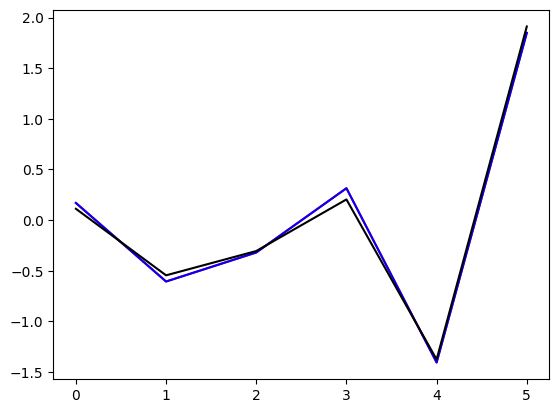

In [187]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [188]:
plt.clf()

<Figure size 640x480 with 0 Axes>

HOMER perform PCA on correlation matrix <br>

In [189]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [190]:
# print('explained_variances')
# print(explained_variances, '\n')
# print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
# print((V_Cx > 0) == (Vh > 0), '\n')


print(V_Cx, '\n')
print(V_Cx > 0, '\n')
print(Vh, '\n')
print(Vh > 0, '\n')

[[-0.76  0.72 -0.02 -0.68  0.76 -0.75]
 [-0.    0.14 -0.23 -0.07 -0.11  0.09]
 [-0.03 -0.    0.04 -0.04 -0.03  0.04]
 [-0.01  0.   -0.    0.01 -0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.   -0.    0.   -0.    0.  ]] 

[[False  True False False  True False]
 [False  True False False False  True]
 [False False  True False False  True]
 [False  True False  True False  True]
 [ True  True  True  True  True  True]
 [ True False False  True False  True]] 

[[-0.46  0.44 -0.01 -0.42  0.46 -0.46]
 [-0.    0.45 -0.73 -0.21 -0.36  0.28]
 [-0.38 -0.03  0.48 -0.52 -0.33  0.49]
 [-0.74  0.05 -0.07  0.65 -0.08  0.13]
 [ 0.28  0.65  0.32  0.26  0.35  0.45]
 [-0.11 -0.42 -0.34 -0.15  0.64  0.51]] 

[[False  True False False  True False]
 [False  True False False False  True]
 [False False  True False False  True]
 [False  True False  True False  True]
 [ True  True  True  True  True  True]
 [False False False False  True  True]] 



In [191]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.   -0.58  0.    0.74 -0.5   0.59]
 [-0.58  1.   -0.42 -0.63  0.49 -0.38]
 [ 0.   -0.42  1.    0.15  0.31 -0.02]
 [ 0.74 -0.63  0.15  1.   -0.32  0.44]
 [-0.5   0.49  0.31 -0.32  1.   -0.85]
 [ 0.59 -0.38 -0.02  0.44 -0.85  1.  ]] 

V_Cx[0]
[-0.76  0.72 -0.02 -0.68  0.76 -0.75] 

Vh[0]
[-0.46  0.44 -0.01 -0.42  0.46 -0.46] 

cov_x
[[ 0.37 -0.33 -0.    0.33 -0.34  0.33]
 [-0.33  0.37 -0.11 -0.33  0.28 -0.29]
 [-0.   -0.11  0.19  0.04  0.06 -0.04]
 [ 0.33 -0.33  0.04  0.32 -0.28  0.28]
 [-0.34  0.28  0.06 -0.28  0.4  -0.39]
 [ 0.33 -0.29 -0.04  0.28 -0.39  0.39]] 

cov_x_sum
[1.7050751171044851, 1.7140219836352568, 0.43743396213459057, 1.5712432008442057, 1.7549358620534696, 1.7080341439934263] 



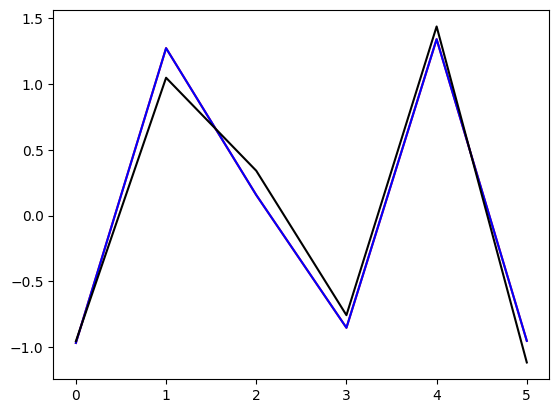

In [192]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [193]:
plt.clf()

<Figure size 640x480 with 0 Axes>